In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, os
from collections import defaultdict

In [21]:
results = {}
for context_length in [512, 1024, 2048]:
    for checkpoint in [0, 50, 100, 150, 200, 250, 300]:
        output_dir = f"/home/myang4/TinyZero/evaluate/outputs/context-length-{context_length}-{checkpoint}/"
        with open(os.path.join(output_dir, "results.pkl"), 'rb') as f:
            results[context_length, checkpoint] = pickle.load(f)

In [22]:
results[512, 0]

{'difficulty': [3, 4, 5, 6],
 'mean_reward': [0.666, 0.228, 0.041, 0.003],
 'mean_correct_length': [237.26276276276278,
  301.780701754386,
  340.5853658536585,
  320.6666666666667],
 'mean_incorrect_length': [400.4670658682635,
  431.5854922279793,
  447.0677789363921,
  457.65095285857575],
 'mean_length': [291.773, 401.99, 442.702, 457.24]}

### Plot rewards

In [27]:
def plot(key):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
    axes = axes.flatten()

    for i, context_length in enumerate([512, 1024, 2048]):

        x = [0, 50, 100, 150, 200, 250, 300]
        difficulty_to_y = defaultdict(list)
        
        for checkpoint in x:
            
            for difficulty, reward in zip(results[context_length, checkpoint]['difficulty'], results[context_length, checkpoint][key]):
                
                difficulty_to_y[difficulty].append(reward)
        

        for difficulty in range(3, 7):
            sns.lineplot(x=x, y=difficulty_to_y[difficulty], label=f"{difficulty} candidates", ax=axes[i])

        axes[i].set_title(f"context length = {context_length}")
        axes[i].set_ylabel(key)
        axes[i].set_xlabel('gradient steps')
        axes[i].get_legend().remove()
    
    plt.legend(title='difficulty', loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

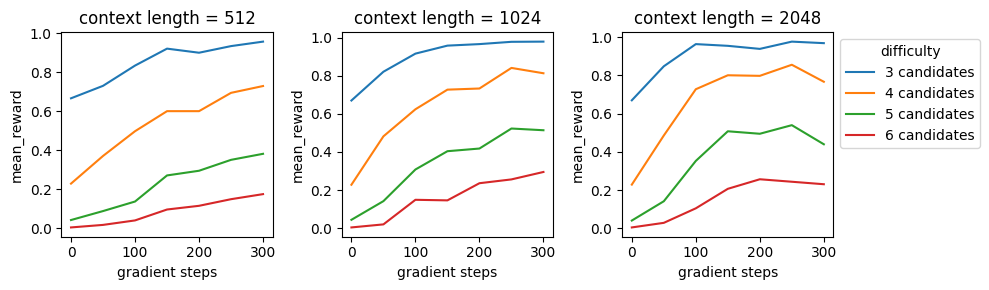

In [28]:
plot('mean_reward')

### Plot lengths

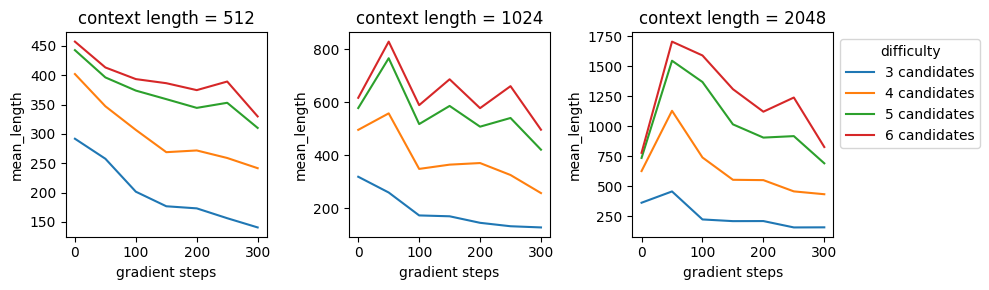

In [29]:
plot('mean_length')

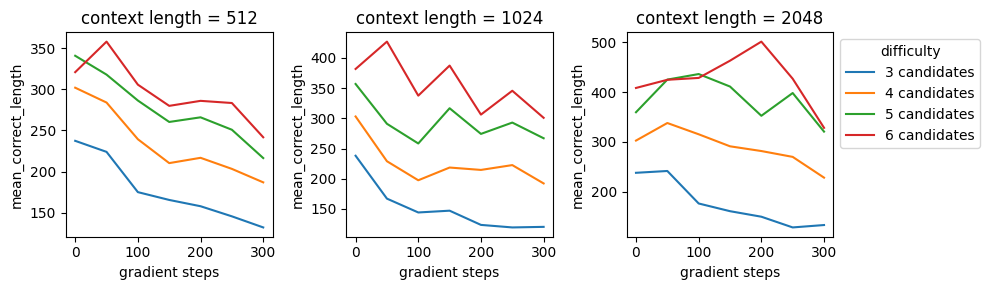

In [30]:
plot('mean_correct_length')

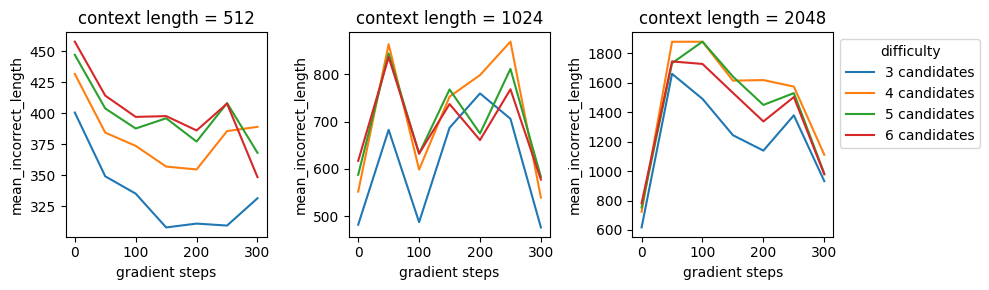

In [31]:
plot('mean_incorrect_length')